In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import json

from IPython.display import display # for displaying all the data in a dataframe

# Exploratory Data Analysis

In [2]:
# Display settings (to see all data)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 5000)  # Set a high value to ensure no line breaks

pd.set_option('display.max_columns', None)  # No limit on columns
pd.set_option('display.max_rows', None)     # No limit on rows

In [3]:
#Loading Data
df_games=pd.read_csv("../1-Original Data/games.csv")
df_champions_1=pd.read_json("../1-Original Data/champion_info.json")
df_champions_2=pd.read_json("../1-Original Data/champion_info_2.json")
df_spells=pd.read_json("../1-Original Data/summoner_spell_info.json")

In [4]:
df_games.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,t1_champ1_sum1,t1_champ1_sum2,t1_champ2id,t1_champ2_sum1,t1_champ2_sum2,t1_champ3id,t1_champ3_sum1,t1_champ3_sum2,t1_champ4id,t1_champ4_sum1,t1_champ4_sum2,t1_champ5id,t1_champ5_sum1,t1_champ5_sum2,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_champ1id,t2_champ1_sum1,t2_champ1_sum2,t2_champ2id,t2_champ2_sum1,t2_champ2_sum2,t2_champ3id,t2_champ3_sum1,t2_champ3_sum2,t2_champ4id,t2_champ4_sum1,t2_champ4_sum2,t2_champ5id,t2_champ5_sum1,t2_champ5_sum2,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,2,8,12,4,432,3,4,96,4,7,11,11,6,112,4,14,11,1,2,3,0,92,40,69,119,141,104,11,4,498,4,7,122,6,4,238,14,4,412,4,3,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,1,119,7,4,39,12,4,76,4,3,10,4,14,35,4,11,10,4,0,2,1,51,122,17,498,19,54,4,12,25,4,14,120,11,4,157,4,14,92,4,7,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,0,18,4,7,141,11,4,267,3,4,68,4,12,38,12,4,8,1,1,1,0,117,40,29,16,53,69,4,7,412,14,4,126,4,12,24,4,11,22,7,4,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,0,57,4,12,63,4,14,29,4,7,61,4,1,36,11,4,9,2,1,2,0,238,67,516,114,31,90,14,4,19,11,4,412,4,3,92,4,14,22,4,7,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,0,19,4,12,29,11,4,40,4,3,119,4,7,134,7,4,9,2,1,3,0,90,64,412,25,31,37,3,4,59,4,12,141,11,4,38,4,12,51,4,7,3,0,0,1,0,86,11,201,122,18


In [5]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51490 entries, 0 to 51489
Data columns (total 61 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gameId              51490 non-null  int64
 1   creationTime        51490 non-null  int64
 2   gameDuration        51490 non-null  int64
 3   seasonId            51490 non-null  int64
 4   winner              51490 non-null  int64
 5   firstBlood          51490 non-null  int64
 6   firstTower          51490 non-null  int64
 7   firstInhibitor      51490 non-null  int64
 8   firstBaron          51490 non-null  int64
 9   firstDragon         51490 non-null  int64
 10  firstRiftHerald     51490 non-null  int64
 11  t1_champ1id         51490 non-null  int64
 12  t1_champ1_sum1      51490 non-null  int64
 13  t1_champ1_sum2      51490 non-null  int64
 14  t1_champ2id         51490 non-null  int64
 15  t1_champ2_sum1      51490 non-null  int64
 16  t1_champ2_sum2      51490 non-null  int6

In [6]:
df_games.isnull().sum()

gameId                0
creationTime          0
gameDuration          0
seasonId              0
winner                0
firstBlood            0
firstTower            0
firstInhibitor        0
firstBaron            0
firstDragon           0
firstRiftHerald       0
t1_champ1id           0
t1_champ1_sum1        0
t1_champ1_sum2        0
t1_champ2id           0
t1_champ2_sum1        0
t1_champ2_sum2        0
t1_champ3id           0
t1_champ3_sum1        0
t1_champ3_sum2        0
t1_champ4id           0
t1_champ4_sum1        0
t1_champ4_sum2        0
t1_champ5id           0
t1_champ5_sum1        0
t1_champ5_sum2        0
t1_towerKills         0
t1_inhibitorKills     0
t1_baronKills         0
t1_dragonKills        0
t1_riftHeraldKills    0
t1_ban1               0
t1_ban2               0
t1_ban3               0
t1_ban4               0
t1_ban5               0
t2_champ1id           0
t2_champ1_sum1        0
t2_champ1_sum2        0
t2_champ2id           0
t2_champ2_sum1        0
t2_champ2_sum2  

In [7]:
df_champions_1.head()

,type,version,data
1,champion,7.17.2,"{'title': 'the Dark Child', 'id': 1, 'key': 'Annie', 'name': 'Annie'}"
10,champion,7.17.2,"{'title': 'The Judicator', 'id': 10, 'key': 'Kayle', 'name': 'Kayle'}"
101,champion,7.17.2,"{'title': 'the Magus Ascendant', 'id': 101, 'key': 'Xerath', 'name': 'Xerath'}"
102,champion,7.17.2,"{'title': 'the Half-Dragon', 'id': 102, 'key': 'Shyvana', 'name': 'Shyvana'}"
103,champion,7.17.2,"{'title': 'the Nine-Tailed Fox', 'id': 103, 'key': 'Ahri', 'name': 'Ahri'}"


In [8]:
df_champions_2.head()

,type,version,data
Aatrox,champion,7.18.1,"{'tags': ['Fighter', 'Tank'], 'title': 'the Darkin Blade', 'id': 266, 'key': 'Aatrox', 'name': 'Aatrox'}"
Ahri,champion,7.18.1,"{'tags': ['Mage', 'Assassin'], 'title': 'the Nine-Tailed Fox', 'id': 103, 'key': 'Ahri', 'name': 'Ahri'}"
Akali,champion,7.18.1,"{'tags': ['Assassin'], 'title': 'the Fist of Shadow', 'id': 84, 'key': 'Akali', 'name': 'Akali'}"
Alistar,champion,7.18.1,"{'tags': ['Tank', 'Support'], 'title': 'the Minotaur', 'id': 12, 'key': 'Alistar', 'name': 'Alistar'}"
Amumu,champion,7.18.1,"{'tags': ['Tank', 'Mage'], 'title': 'the Sad Mummy', 'id': 32, 'key': 'Amumu', 'name': 'Amumu'}"


In [9]:
df_spells.head()

,type,version,data
1,summoner,7.17.2,"{'id': 1, 'summonerLevel': 6, 'name': 'Cleanse', 'key': 'SummonerBoost', 'description': 'Removes all disables (excluding suppression and airborne) and summoner spell debuffs affecting your champion and lowers the duration of incoming disables by 65% for 3 seconds.'}"
11,summoner,7.17.2,"{'id': 11, 'summonerLevel': 10, 'name': 'Smite', 'key': 'SummonerSmite', 'description': 'Deals 390-1000 true damage (depending on champion level) to target epic, large, or medium monster or enemy minion. Restores Health based on your maximum life when used against monsters.'}"
12,summoner,7.17.2,"{'id': 12, 'summonerLevel': 6, 'name': 'Teleport', 'key': 'SummonerTeleport', 'description': 'After channeling for 4.5 seconds, teleports your champion to target allied structure, minion, or ward.'}"
13,summoner,7.17.2,"{'id': 13, 'summonerLevel': 1, 'name': 'Clarity', 'key': 'SummonerMana', 'description': 'Restores 50% of your champion's maximum Mana. Also restores allies for 25% of their maximum Mana.'}"
14,summoner,7.17.2,"{'id': 14, 'summonerLevel': 10, 'name': 'Ignite', 'key': 'SummonerDot', 'description': 'Ignites target enemy champion, dealing 70-410 true damage (depending on champion level) over 5 seconds, grants you vision of the target, and reduces healing effects on them for the duration.'}"


# Preparing Data for Power BI

When we try to upload the current JSON files, Here is what happens when we try to upload the JSON file into PowerBI

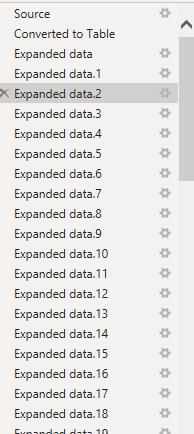

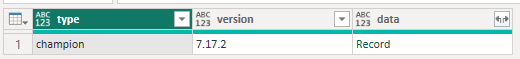

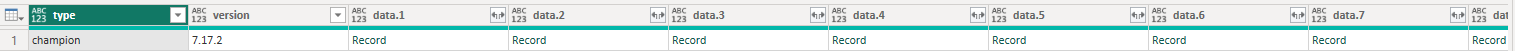

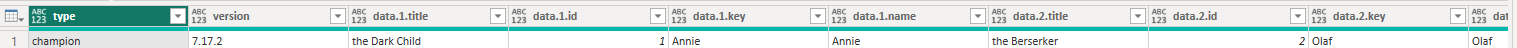

PowerBI doesn't know how to extract the collumns and rows from the actual structure of the JSON files (champion_info.json, champion_info_2.json, summoner_spell_info.json)

In order to fix that, we need to change the JSON files structures

In [10]:
#Let's extract the 'data' part which contains the champions info
df_champions_1 = df_champions_1['data']

In [11]:
display(df_champions_1)

1                           {'title': 'the Dark Child', 'id': 1, 'key': 'Annie', 'name': 'Annie'}
10                          {'title': 'The Judicator', 'id': 10, 'key': 'Kayle', 'name': 'Kayle'}
101                {'title': 'the Magus Ascendant', 'id': 101, 'key': 'Xerath', 'name': 'Xerath'}
102                  {'title': 'the Half-Dragon', 'id': 102, 'key': 'Shyvana', 'name': 'Shyvana'}
103                    {'title': 'the Nine-Tailed Fox', 'id': 103, 'key': 'Ahri', 'name': 'Ahri'}
104                         {'title': 'the Outlaw', 'id': 104, 'key': 'Graves', 'name': 'Graves'}
105                    {'title': 'the Tidal Trickster', 'id': 105, 'key': 'Fizz', 'name': 'Fizz'}
106             {'title': 'the Thunder's Roar', 'id': 106, 'key': 'Volibear', 'name': 'Volibear'}
107                   {'title': 'the Pridestalker', 'id': 107, 'key': 'Rengar', 'name': 'Rengar'}
11              {'title': 'the Wuju Bladesman', 'id': 11, 'key': 'MasterYi', 'name': 'Master Yi'}
110             {'ti

In [12]:
# We'll create a new dictionary with 'id' as keys and the rest as values

# Initialize an empty dictionary
champions_1_dict = {}

# Iterate over the Series items
for item in df_champions_1:
    # Each item is a dictionary, so we use the 'id' as the key for the new dictionary
    # We'll copy the dictionary to not alter the original data
    champion_1_info = item.copy()
    champion_1_id = champion_1_info.pop('id')
    champions_1_dict[champion_1_id] = champion_1_info

In [13]:
# Convert the dictionary to a JSON string.
json_string = json.dumps(champions_1_dict, indent=4)

# Output the JSON string to a file.
with open('../3-Uploaded Data/20240401/champion_info_processed.json', 'w') as outfile:
    outfile.write(json_string)

In [14]:
print(json_string)

{
    "1": {
        "title": "the Dark Child",
        "key": "Annie",
        "name": "Annie"
    },
    "10": {
        "title": "The Judicator",
        "key": "Kayle",
        "name": "Kayle"
    },
    "101": {
        "title": "the Magus Ascendant",
        "key": "Xerath",
        "name": "Xerath"
    },
    "102": {
        "title": "the Half-Dragon",
        "key": "Shyvana",
        "name": "Shyvana"
    },
    "103": {
        "title": "the Nine-Tailed Fox",
        "key": "Ahri",
        "name": "Ahri"
    },
    "104": {
        "title": "the Outlaw",
        "key": "Graves",
        "name": "Graves"
    },
    "105": {
        "title": "the Tidal Trickster",
        "key": "Fizz",
        "name": "Fizz"
    },
    "106": {
        "title": "the Thunder's Roar",
        "key": "Volibear",
        "name": "Volibear"
    },
    "107": {
        "title": "the Pridestalker",
        "key": "Rengar",
        "name": "Rengar"
    },
    "11": {
        "title": "the Wuju Blades

In [15]:
df_champions_2=df_champions_2['data']

In [16]:
with pd.option_context('display.max_colwidth', None): # get all columns inside the serie
    display(df_champions_2)

Aatrox                         {'tags': ['Fighter', 'Tank'], 'title': 'the Darkin Blade', 'id': 266, 'key': 'Aatrox', 'name': 'Aatrox'}
Ahri                           {'tags': ['Mage', 'Assassin'], 'title': 'the Nine-Tailed Fox', 'id': 103, 'key': 'Ahri', 'name': 'Ahri'}
Akali                                  {'tags': ['Assassin'], 'title': 'the Fist of Shadow', 'id': 84, 'key': 'Akali', 'name': 'Akali'}
Alistar                           {'tags': ['Tank', 'Support'], 'title': 'the Minotaur', 'id': 12, 'key': 'Alistar', 'name': 'Alistar'}
Amumu                                   {'tags': ['Tank', 'Mage'], 'title': 'the Sad Mummy', 'id': 32, 'key': 'Amumu', 'name': 'Amumu'}
Anivia                           {'tags': ['Mage', 'Support'], 'title': 'the Cryophoenix', 'id': 34, 'key': 'Anivia', 'name': 'Anivia'}
Annie                                           {'tags': ['Mage'], 'title': 'the Dark Child', 'id': 1, 'key': 'Annie', 'name': 'Annie'}
Ashe                            {'tags': ['Marks

In [17]:
#champions_2_dict=sorted(champions_2_dict)

### if unique_ids:
    # Convert the dictionary to a JSON string
    json_string = json.dumps(champions_2_dict, indent=4)

    # Write the JSON string to a file in Kaggle notebook's working directory
    with open('champions_info_2_processed.json', 'w') as outfile:
        outfile.write(json_string)

    # Inform the user
    print("JSON file created successfully.")
else:
    print("JSON file was not created due to non-unique IDs.")

In [18]:
df_spells=df_spells['data']

In [19]:
with pd.option_context('display.max_colwidth', None): # get all columns inside the serie
    display(df_spells)

1                                                            {'id': 1, 'summonerLevel': 6, 'name': 'Cleanse', 'key': 'SummonerBoost', 'description': 'Removes all disables (excluding suppression and airborne) and summoner spell debuffs affecting your champion and lowers the duration of incoming disables by 65% for 3 seconds.'}
11                                                 {'id': 11, 'summonerLevel': 10, 'name': 'Smite', 'key': 'SummonerSmite', 'description': 'Deals 390-1000 true damage (depending on champion level) to target epic, large, or medium monster or enemy minion. Restores Health based on your maximum life when used against monsters.'}
12                                                                                                                               {'id': 12, 'summonerLevel': 6, 'name': 'Teleport', 'key': 'SummonerTeleport', 'description': 'After channeling for 4.5 seconds, teleports your champion to target allied structure, minion, or ward.'}
13              

In [20]:
spells_dict = {item['id']: item for item in df_spells.dropna()}
# Convert the dictionary to a JSON string
json_string = json.dumps(spells_dict, indent=4)

# Write the JSON string to a file
with open('../3-Uploaded Data/20240401/summoner_spell_info_processed.json', 'w') as outfile:
    outfile.write(json_string)

Lets try and upload the files in PowerBi

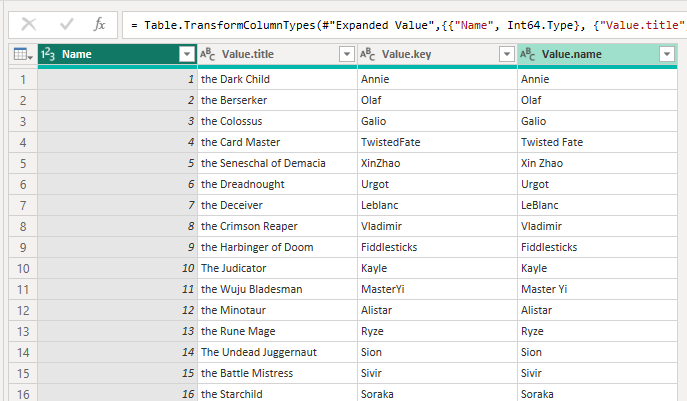

And that's a success!

Let's now upload all the other files, and move on to PowerBI for some more insights

# PowerBI

As we are defining our models, we found that "gameId" in Games is not unique, let's investigate...

13 gameIds 3 times, 400 gameIds 2 times

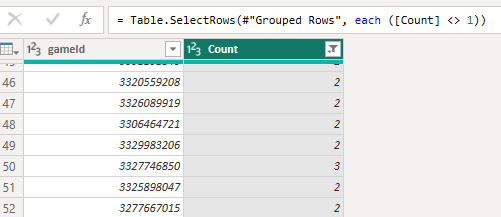

After investigating, we found out that some rows are just duplicates

In [49]:
#Let's check for duplicates
duplicates = df_games[df_games.duplicated()]
print(duplicates)

#437 duplicates

           gameId   creationTime  gameDuration  seasonId  winner  firstBlood  firstTower  firstInhibitor  firstBaron  firstDragon  ...  t2_towerKills  t2_inhibitorKills  t2_baronKills  t2_dragonKills  t2_riftHeraldKills  t2_ban1  t2_ban2  t2_ban3  t2_ban4  t2_ban5
1133   3279461217  1501091345316          2216         9       1           2           2               1           1            1  ...              5                  0              0               1                   0       51      119      161      154       17
2194   3315584128  1503510307997          2327         9       2           2           2               2           2            2  ...              8                  1              1               1                   0       53      121      238      157      119
2713   3320559208  1503857188051          1683         9       1           2           1               1           1            1  ...              2                  0              0               0      

In [31]:
#we can remove duplicates by doing this:
#df_unique = df.drop_duplicates()

#but for now, lets work on powerbi

In [32]:
df=df_games[['winner','firstBlood','firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald','t1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills','t2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHeraldKills',]]

In [33]:
df.corr()

,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
winner,1.000000,0.174770,0.375697,0.536437,0.261888,0.310386,0.119813,-0.771541,-0.649405,-0.369472,-0.472483,-0.218066,0.785813,0.660452,0.399249,0.497206,0.226102
firstBlood,0.174770,1.000000,0.263866,0.169761,0.077293,0.189092,0.084062,-0.128116,-0.098918,-0.030571,-0.082820,-0.081243,0.223657,0.151111,0.076395,0.161045,0.122195
firstTower,0.375697,0.263866,1.000000,0.380326,0.165028,0.403552,0.185989,-0.316477,-0.240035,-0.056867,-0.201023,-0.188326,0.511296,0.347641,0.161308,0.364361,0.274713
firstInhibitor,0.536437,0.169761,0.380326,1.000000,0.417848,0.352760,0.166521,-0.276349,-0.269425,-0.076762,-0.161124,-0.100527,0.755335,0.699832,0.400133,0.487373,0.211380
firstBaron,0.261888,0.077293,0.165028,0.417848,1.000000,0.201065,0.120714,-0.003740,-0.026035,0.134069,0.082034,-0.009653,0.460115,0.385864,0.793114,0.393952,0.121126
firstDragon,0.310386,0.189092,0.403552,0.352760,0.201065,1.000000,0.159429,-0.190550,-0.164399,-0.045496,-0.386488,-0.102283,0.427092,0.299977,0.195352,0.629794,0.205444
firstRiftHerald,0.119813,0.084062,0.185989,0.166521,0.120714,0.159429,1.000000,-0.083813,-0.059551,0.008027,-0.058104,0.189081,0.188240,0.141677,0.101231,0.150173,0.866779
t1_towerKills,-0.771541,-0.128116,-0.316477,-0.276349,-0.003740,-0.190550,-0.083813,1.000000,0.824471,0.490723,0.626743,0.283925,-0.549123,-0.469600,-0.158556,-0.313789,-0.224888
t1_inhibitorKills,-0.649405,-0.098918,-0.240035,-0.269425,-0.026035,-0.164399,-0.059551,0.824471,1.000000,0.481606,0.538469,0.210728,-0.467867,-0.408924,-0.153026,-0.279089,-0.164355
t1_baronKills,-0.369472,-0.030571,-0.056867,-0.076762,0.134069,-0.045496,0.008027,0.490723,0.481606,1.000000,0.409380,0.119870,-0.144271,-0.146382,-0.189526,-0.027525,-0.053148


We have high correlation between winner, towerkills, inhibitorkills

medium correlation 

In [50]:
df["winner"].unique()

array([1, 2], dtype=int64)

In [35]:
df.columns

Index(['winner', 'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 't1_riftHeraldKills', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills', 't2_riftHeraldKills'], dtype='object')

In [36]:
df.isnull().sum()

winner                0
firstBlood            0
firstTower            0
firstInhibitor        0
firstBaron            0
firstDragon           0
firstRiftHerald       0
t1_towerKills         0
t1_inhibitorKills     0
t1_baronKills         0
t1_dragonKills        0
t1_riftHeraldKills    0
t2_towerKills         0
t2_inhibitorKills     0
t2_baronKills         0
t2_dragonKills        0
t2_riftHeraldKills    0
dtype: int64

Modelling

In [ ]:
#!pip install pycaret

In [38]:
from pycaret.classification import*

In [39]:
setup(df,target="winner")

,Description,Value
0,Session id,5373
1,Target,winner
2,Target type,Binary
3,Target mapping,"1: 0, 2: 1"
4,Original data shape,"(51490, 17)"
5,Transformed data shape,"(51490, 17)"
6,Transformed train set shape,"(36043, 17)"
7,Transformed test set shape,"(15447, 17)"
8,Numeric features,16
9,Preprocess,True


In [40]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9722,0.9975,0.9722,0.9723,0.9722,0.9444,0.9445,0.4630
lightgbm,Light Gradient Boosting Machine,0.9718,0.9976,0.9718,0.9718,0.9718,0.9435,0.9436,0.1880
rf,Random Forest Classifier,0.9710,0.9971,0.9710,0.9711,0.9710,0.9421,0.9421,0.2920
et,Extra Trees Classifier,0.9698,0.9964,0.9698,0.9699,0.9698,0.9396,0.9397,0.3260
ada,Ada Boost Classifier,0.9669,0.9968,0.9669,0.9671,0.9669,0.9337,0.9340,0.1920
knn,K Neighbors Classifier,0.9648,0.9921,0.9648,0.9648,0.9648,0.9295,0.9295,0.4400
dt,Decision Tree Classifier,0.9629,0.9715,0.9629,0.9630,0.9629,0.9258,0.9259,0.0240
lr,Logistic Regression,0.9617,0.9952,0.9617,0.9618,0.9617,0.9233,0.9235,0.5390
ridge,Ridge Classifier,0.9603,0.9946,0.9603,0.9605,0.9603,0.9206,0.9208,0.0160
lda,Linear Discriminant Analysis,0.9603,0.9946,0.9603,0.9605,0.9603,0.9206,0.9208,0.0370


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=5373, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [41]:
best_model=create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9684,0.9966,0.9684,0.9685,0.9684,0.9367,0.9368
1,0.9728,0.9980,0.9728,0.9729,0.9728,0.9456,0.9457
2,0.9681,0.9971,0.9681,0.9682,0.9681,0.9362,0.9363
3,0.9748,0.9976,0.9748,0.9748,0.9747,0.9495,0.9495
4,0.9703,0.9975,0.9703,0.9703,0.9703,0.9406,0.9406
5,0.9745,0.9982,0.9745,0.9746,0.9745,0.9489,0.9490
6,0.9736,0.9981,0.9736,0.9736,0.9736,0.9473,0.9473
7,0.9700,0.9973,0.9700,0.9701,0.9700,0.9400,0.9401
8,0.9748,0.9981,0.9748,0.9748,0.9747,0.9495,0.9496


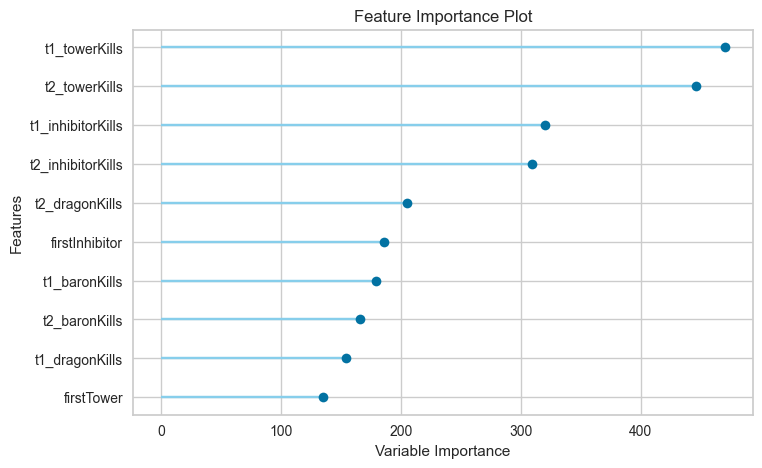

In [42]:
plot_model(best_model,plot="feature")

In [43]:
best_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5373, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [44]:
import pickle

In [45]:
pickle.dump(best_model,open("lol.pkl","wb"))

In [46]:
yenimodel=pickle.load(open("lol.pkl","rb"))
##In the new model, we enter the columns one by one and have the price predicted.
#0= 1st team
#1= 2nd team

In [47]:
#New Model (Test)

### 